## Loading packages and Data

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import r_regression

In [3]:
pl_players = pd.read_csv('./data/premier_league_data_fb_ref.csv')
bundesliga_players = pd.read_csv('./data/bundesliga_data_fb_ref.csv')
la_liga_players = pd.read_csv('./data/la_liga_data_fb_ref.csv')
ligue_1_players = pd.read_csv('./data/ligue_1_data_fb_ref.csv')
serie_a_players = pd.read_csv('./data/serie_a_data_fb_ref.csv')

## Preprocessing 

### Adding composite columns

In [4]:
#ADDING TOTAL R+Y YELLOW CARD COLUMN
pl_players['CrdTot'] = pl_players['CrdY'] + pl_players['CrdR']
bundesliga_players['CrdTot'] = bundesliga_players['CrdY'] + bundesliga_players['CrdR']
la_liga_players['CrdTot'] = la_liga_players['CrdY'] + la_liga_players['CrdR']
ligue_1_players['CrdTot'] = ligue_1_players['CrdY'] + ligue_1_players['CrdR']
serie_a_players['CrdTot'] = serie_a_players['CrdY'] + serie_a_players['CrdR']

### Grouping values in dataset

In [5]:
pl_season_data = pl_players.groupby(['Season'])
pl_season_diversity = pl_season_data['Nation'].nunique().to_dict()

bundesliga_season_data = bundesliga_players.groupby(['Season'])
bundesliga_season_diversity = bundesliga_season_data['Nation'].nunique().to_dict()

la_liga_season_data = la_liga_players.groupby(['Season'])
la_liga_season_diversity = la_liga_season_data['Nation'].nunique().to_dict()

ligue_1_season_data = ligue_1_players.groupby(['Season'])
ligue_1_season_diversity = ligue_1_season_data['Nation'].nunique().to_dict()

serie_a_season_data = serie_a_players.groupby(['Season'])
serie_a_season_diversity = serie_a_season_data['Nation'].nunique().to_dict()


## Plot the diversity values : Season vs Diversity (# of Nations)

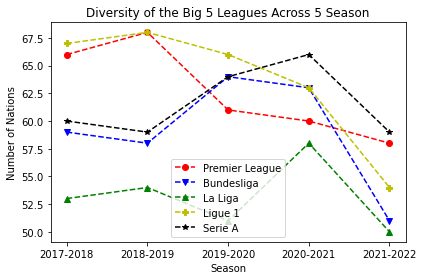

<Figure size 432x288 with 0 Axes>

In [6]:
seasons = ['2017-2018', '2018-2019', '2019-2020', '2020-2021', '2021-2022']
plt.plot(seasons, pl_season_diversity.values(), 'ro', linestyle='dashed', label='Premier League')
plt.plot(seasons, bundesliga_season_diversity.values(), 'bv', linestyle='dashed', label='Bundesliga')
plt.plot(seasons, la_liga_season_diversity.values(), 'g^', linestyle='dashed', label='La Liga')
plt.plot(seasons, ligue_1_season_diversity.values(), 'yP', linestyle='dashed', label='Ligue 1')
plt.plot(seasons, serie_a_season_diversity.values(), 'k*', linestyle='dashed', label='Serie A')
plt.legend()
plt.xlabel('Season')
plt.ylabel('Number of Nations')
plt.title('Diversity of the Big 5 Leagues Across {0} Season'.format(len(seasons)))
plt.tight_layout()
plt.show()
plt.savefig('./figures/big5_season_diversity.png')

## Plotting and Correlation Analysis: xG 

In [7]:
pl_season_mean_xg = pl_season_data['xG'].mean().to_dict()

bundesliga_season_mean_xg = bundesliga_season_data['xG'].mean().to_dict()

la_liga_season_mean_xg = la_liga_season_data['xG'].mean().to_dict()

ligue_1_season_mean_xg = ligue_1_season_data['xG'].mean().to_dict()

serie_a_season_mean_xg = serie_a_season_data['xG'].mean().to_dict()

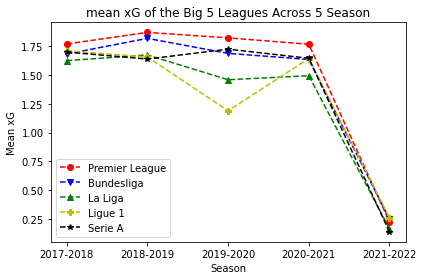

<Figure size 432x288 with 0 Axes>

In [8]:
seasons = ['2017-2018', '2018-2019', '2019-2020', '2020-2021', '2021-2022']
plt.plot(seasons, pl_season_mean_xg.values(), 'ro', linestyle='dashed', label='Premier League')
plt.plot(seasons, bundesliga_season_mean_xg.values(), 'bv', linestyle='dashed', label='Bundesliga')
plt.plot(seasons, la_liga_season_mean_xg.values(), 'g^', linestyle='dashed', label='La Liga')
plt.plot(seasons, ligue_1_season_mean_xg.values(), 'yP', linestyle='dashed', label='Ligue 1')
plt.plot(seasons, serie_a_season_mean_xg.values(), 'k*', linestyle='dashed', label='Serie A')
plt.legend()
plt.xlabel('Season')
plt.ylabel('Mean xG')
plt.title('mean xG of the Big 5 Leagues Across {0} Season'.format(len(seasons)))
plt.tight_layout()
plt.show()
plt.savefig('./figures/big5_season_diversity.png')

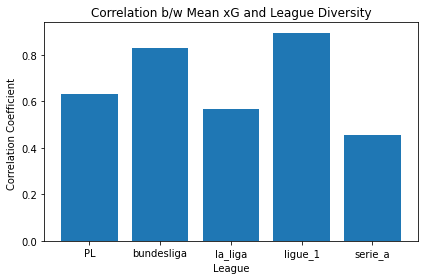

<Figure size 432x288 with 0 Axes>

In [9]:
pl_xg_regression = float(r_regression(np.array(list(pl_season_diversity.values())).reshape(-1, 1),list(pl_season_mean_xg.values())))
bundesliga_xg_regression = float(r_regression(np.array(list(bundesliga_season_diversity.values())).reshape(-1, 1),list(bundesliga_season_mean_xg.values())))
la_liga_xg_regression = float(r_regression(np.array(list(la_liga_season_diversity.values())).reshape(-1, 1),list(la_liga_season_mean_xg.values())))
ligue_1_xg_regression = float(r_regression(np.array(list(ligue_1_season_diversity.values())).reshape(-1, 1),list(ligue_1_season_mean_xg.values())))
serie_a_xg_regression = float(r_regression(np.array(list(serie_a_season_diversity.values())).reshape(-1, 1),list(serie_a_season_mean_xg.values())))

xg_regression= np.array([pl_xg_regression, bundesliga_xg_regression, la_liga_xg_regression, ligue_1_xg_regression, serie_a_xg_regression])
plt.bar(x=np.array(["PL","bundesliga","la_liga","ligue_1","serie_a"]), height=xg_regression)

plt.xlabel('League')
plt.ylabel('Correlation Coefficient ')
plt.title('Correlation b/w Mean xG and League Diversity')
plt.tight_layout()
plt.show()
plt.savefig('./figures/xG.png')

## Plotting and Correlation Analysis: Card Penalties 

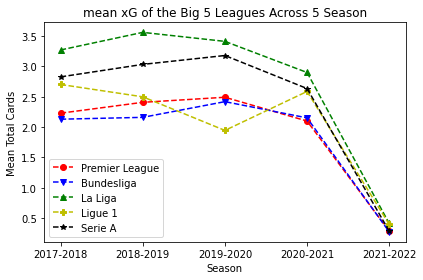

<Figure size 432x288 with 0 Axes>

In [10]:
pl_season_tot_cards = pl_season_data['CrdTot'].mean().to_dict()
bundesliga_season_tot_cards = bundesliga_season_data['CrdTot'].mean().to_dict()
la_liga_season_tot_cards = la_liga_season_data['CrdTot'].mean().to_dict()
ligue_1_season_tot_cards = ligue_1_season_data['CrdTot'].mean().to_dict()
serie_a_season_tot_cards = serie_a_season_data['CrdTot'].mean().to_dict()

seasons = ['2017-2018', '2018-2019', '2019-2020', '2020-2021', '2021-2022']
plt.plot(seasons, pl_season_tot_cards.values(), 'ro', linestyle='dashed', label='Premier League')
plt.plot(seasons, bundesliga_season_tot_cards.values(), 'bv', linestyle='dashed', label='Bundesliga')
plt.plot(seasons, la_liga_season_tot_cards.values(), 'g^', linestyle='dashed', label='La Liga')
plt.plot(seasons, ligue_1_season_tot_cards.values(), 'yP', linestyle='dashed', label='Ligue 1')
plt.plot(seasons, serie_a_season_tot_cards.values(), 'k*', linestyle='dashed', label='Serie A')
plt.legend()
plt.xlabel('Season')
plt.ylabel('Mean Total Cards')
plt.title('mean xG of the Big 5 Leagues Across {0} Season'.format(len(seasons)))
plt.tight_layout()
plt.show()
plt.savefig('./figures/big5_season_diversity.png')

In [11]:
print(r_regression(np.array(list(pl_season_diversity.values())).reshape(-1, 1),list(pl_season_tot_cards.values())))
print(r_regression(np.array(list(bundesliga_season_diversity.values())).reshape(-1, 1),list(bundesliga_season_tot_cards.values())))
print(r_regression(np.array(list(la_liga_season_diversity.values())).reshape(-1, 1),list(la_liga_season_tot_cards.values())))
print(r_regression(np.array(list(ligue_1_season_diversity.values())).reshape(-1, 1),list(ligue_1_season_tot_cards.values())))
print(r_regression(np.array(list(serie_a_season_diversity.values())).reshape(-1, 1),list(serie_a_season_tot_cards.values())))

[0.63496163]
[0.90626201]
[0.44703436]
[0.8967175]
[0.3957391]


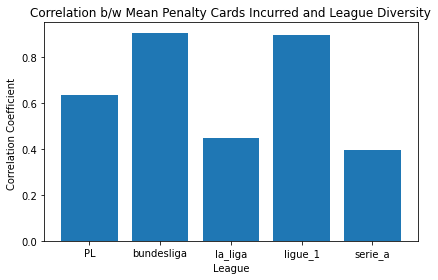

<Figure size 432x288 with 0 Axes>

In [12]:
pl_card_regression = float(r_regression(np.array(list(pl_season_diversity.values())).reshape(-1, 1),list(pl_season_tot_cards.values())))
bundesliga_card_regression = float(r_regression(np.array(list(bundesliga_season_diversity.values())).reshape(-1, 1),list(bundesliga_season_tot_cards.values())))
la_liga_card_regression = float(r_regression(np.array(list(la_liga_season_diversity.values())).reshape(-1, 1),list(la_liga_season_tot_cards.values())))
ligue_1_card_regression = float(r_regression(np.array(list(ligue_1_season_diversity.values())).reshape(-1, 1),list(ligue_1_season_tot_cards.values())))
serie_a_card_regression = float(r_regression(np.array(list(serie_a_season_diversity.values())).reshape(-1, 1),list(serie_a_season_tot_cards.values())))

xg_regression= np.array([pl_card_regression, bundesliga_card_regression, la_liga_card_regression, ligue_1_card_regression, serie_a_card_regression])
plt.bar(x=np.array(["PL","bundesliga","la_liga","ligue_1","serie_a"]), height=xg_regression)

plt.xlabel('League')
plt.ylabel('Correlation Coefficient ')
plt.title('Correlation b/w Mean Penalty Cards Incurred and League Diversity')
plt.tight_layout()
plt.show()
plt.savefig('./figures/tot_cards.png')

## Plotting and Correlation Analysis: PassLive

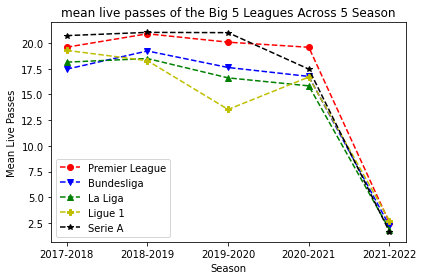

<Figure size 432x288 with 0 Axes>

In [13]:
pl_season_pass_live = pl_season_data['PassLive'].mean().to_dict()
bundesliga_season_pass_live = bundesliga_season_data['PassLive'].mean().to_dict()
la_liga_season_pass_live = la_liga_season_data['PassLive'].mean().to_dict()
ligue_1_season_pass_live = ligue_1_season_data['PassLive'].mean().to_dict()
serie_a_season_pass_live = serie_a_season_data['PassLive'].mean().to_dict()

seasons = ['2017-2018', '2018-2019', '2019-2020', '2020-2021', '2021-2022']
plt.plot(seasons, pl_season_pass_live.values(), 'ro', linestyle='dashed', label='Premier League')
plt.plot(seasons, bundesliga_season_pass_live.values(), 'bv', linestyle='dashed', label='Bundesliga')
plt.plot(seasons, la_liga_season_pass_live.values(), 'g^', linestyle='dashed', label='La Liga')
plt.plot(seasons, ligue_1_season_pass_live.values(), 'yP', linestyle='dashed', label='Ligue 1')
plt.plot(seasons, serie_a_season_pass_live.values(), 'k*', linestyle='dashed', label='Serie A')
plt.legend()
plt.xlabel('Season')
plt.ylabel('Mean Live Passes')
plt.title('mean live passes of the Big 5 Leagues Across {0} Season'.format(len(seasons)))
plt.tight_layout()
plt.show()
plt.savefig('./figures/big5_season_diversity.png')

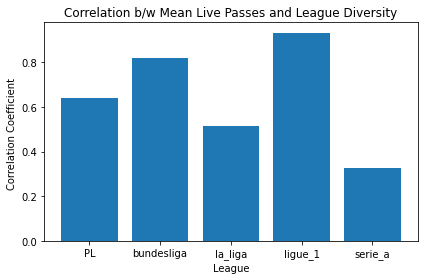

<Figure size 432x288 with 0 Axes>

In [14]:
pl_pass_regression = float(r_regression(np.array(list(pl_season_diversity.values())).reshape(-1, 1),list(pl_season_pass_live.values())))
bundesliga_pass_regression = float(r_regression(np.array(list(bundesliga_season_diversity.values())).reshape(-1, 1),list(bundesliga_season_pass_live.values())))
la_liga_pass_regression = float(r_regression(np.array(list(la_liga_season_diversity.values())).reshape(-1, 1),list(la_liga_season_pass_live.values())))
ligue_1_pass_regression = float(r_regression(np.array(list(ligue_1_season_diversity.values())).reshape(-1, 1),list(ligue_1_season_pass_live.values())))
serie_a_pass_regression = float(r_regression(np.array(list(serie_a_season_diversity.values())).reshape(-1, 1),list(serie_a_season_pass_live.values())))

xg_regression= np.array([pl_pass_regression, bundesliga_pass_regression, la_liga_pass_regression, ligue_1_pass_regression, serie_a_pass_regression])
plt.bar(x=np.array(["PL","bundesliga","la_liga","ligue_1","serie_a"]), height=xg_regression)

plt.xlabel('League')
plt.ylabel('Correlation Coefficient ')
plt.title('Correlation b/w Mean Live Passes and League Diversity')
plt.tight_layout()
plt.show()
plt.savefig('./figures/passlive.png')

## Plotting and Correlation Analysis: Clears

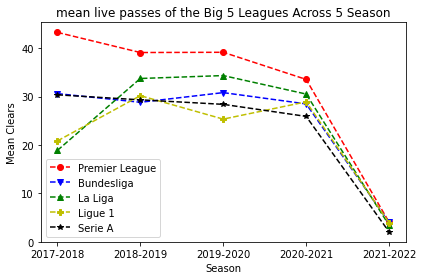

<Figure size 432x288 with 0 Axes>

In [15]:
pl_season_clr = pl_season_data['Clr'].mean().to_dict()
bundesliga_season_clr = bundesliga_season_data['Clr'].mean().to_dict()
la_liga_season_clr = la_liga_season_data['Clr'].mean().to_dict()
ligue_1_season_clr = ligue_1_season_data['Clr'].mean().to_dict()
serie_a_season_clr = serie_a_season_data['Clr'].mean().to_dict()

seasons = ['2017-2018', '2018-2019', '2019-2020', '2020-2021', '2021-2022']
plt.plot(seasons, pl_season_clr.values(), 'ro', linestyle='dashed', label='Premier League')
plt.plot(seasons, bundesliga_season_clr.values(), 'bv', linestyle='dashed', label='Bundesliga')
plt.plot(seasons, la_liga_season_clr.values(), 'g^', linestyle='dashed', label='La Liga')
plt.plot(seasons, ligue_1_season_clr.values(), 'yP', linestyle='dashed', label='Ligue 1')
plt.plot(seasons, serie_a_season_clr.values(), 'k*', linestyle='dashed', label='Serie A')
plt.legend()
plt.xlabel('Season')
plt.ylabel('Mean Clears')
plt.title('mean live passes of the Big 5 Leagues Across {0} Season'.format(len(seasons)))
plt.tight_layout()
plt.show()
plt.savefig('./figures/big5_season_diversity.png')

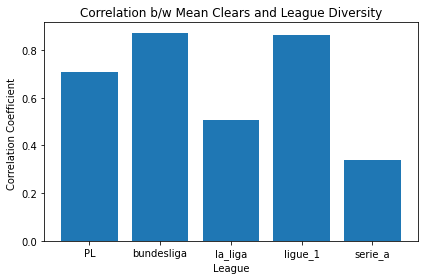

In [22]:
pl_pass_regression = float(r_regression(np.array(list(pl_season_diversity.values())).reshape(-1, 1),list(pl_season_clr.values())))
bundesliga_pass_regression = float(r_regression(np.array(list(bundesliga_season_diversity.values())).reshape(-1, 1),list(bundesliga_season_clr.values())))
la_liga_pass_regression = float(r_regression(np.array(list(la_liga_season_diversity.values())).reshape(-1, 1),list(la_liga_season_clr.values())))
ligue_1_pass_regression = float(r_regression(np.array(list(ligue_1_season_diversity.values())).reshape(-1, 1),list(ligue_1_season_clr.values())))
serie_a_pass_regression = float(r_regression(np.array(list(serie_a_season_diversity.values())).reshape(-1, 1),list(serie_a_season_clr.values())))

xg_regression= np.array([pl_pass_regression, bundesliga_pass_regression, la_liga_pass_regression, ligue_1_pass_regression, serie_a_pass_regression])
plt.bar(x=np.array(["PL","bundesliga","la_liga","ligue_1","serie_a"]), height=xg_regression)

plt.xlabel('League')
plt.ylabel('Correlation Coefficient ')
plt.title('Correlation b/w Mean Clears and League Diversity')
plt.tight_layout()
plt.show()

## Plotting and Correlation Analysis: Total Distance

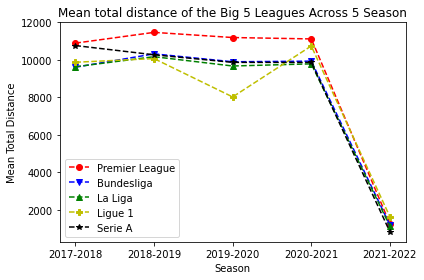

<Figure size 432x288 with 0 Axes>

In [17]:
pl_season_TotDist = pl_season_data['TotDist'].mean().to_dict()
bundesliga_season_TotDist = bundesliga_season_data['TotDist'].mean().to_dict()
la_liga_season_TotDist = la_liga_season_data['TotDist'].mean().to_dict()
ligue_1_season_TotDist = ligue_1_season_data['TotDist'].mean().to_dict()
serie_a_season_TotDist = serie_a_season_data['TotDist'].mean().to_dict()

seasons = ['2017-2018', '2018-2019', '2019-2020', '2020-2021', '2021-2022']
plt.plot(seasons, pl_season_TotDist.values(), 'ro', linestyle='dashed', label='Premier League')
plt.plot(seasons, bundesliga_season_TotDist.values(), 'bv', linestyle='dashed', label='Bundesliga')
plt.plot(seasons, la_liga_season_TotDist.values(), 'g^', linestyle='dashed', label='La Liga')
plt.plot(seasons, ligue_1_season_TotDist.values(), 'yP', linestyle='dashed', label='Ligue 1')
plt.plot(seasons, serie_a_season_TotDist.values(), 'k*', linestyle='dashed', label='Serie A')
plt.legend()
plt.xlabel('Season')
plt.ylabel('Mean Total Distance')
plt.title('Mean total distance of the Big 5 Leagues Across {0} Season'.format(len(seasons)))
plt.tight_layout()
plt.show()
plt.savefig('./figures/big5_season_diversity.png')

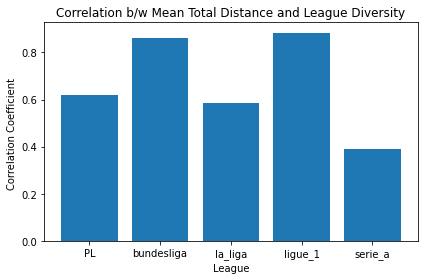

In [23]:
pl_pass_regression = float(r_regression(np.array(list(pl_season_diversity.values())).reshape(-1, 1),list(pl_season_TotDist.values())))
bundesliga_pass_regression = float(r_regression(np.array(list(bundesliga_season_diversity.values())).reshape(-1, 1),list(bundesliga_season_TotDist.values())))
la_liga_pass_regression = float(r_regression(np.array(list(la_liga_season_diversity.values())).reshape(-1, 1),list(la_liga_season_TotDist.values())))
ligue_1_pass_regression = float(r_regression(np.array(list(ligue_1_season_diversity.values())).reshape(-1, 1),list(ligue_1_season_TotDist.values())))
serie_a_pass_regression = float(r_regression(np.array(list(serie_a_season_diversity.values())).reshape(-1, 1),list(serie_a_season_TotDist.values())))

xg_regression= np.array([pl_pass_regression, bundesliga_pass_regression, la_liga_pass_regression, ligue_1_pass_regression, serie_a_pass_regression])
plt.bar(x=np.array(["PL","bundesliga","la_liga","ligue_1","serie_a"]), height=xg_regression)

plt.xlabel('League')
plt.ylabel('Correlation Coefficient ')
plt.title('Correlation b/w Mean Total Distance and League Diversity')
plt.tight_layout()
plt.show()

## Plotting and Correlation Analysis: Tackles Won TklW

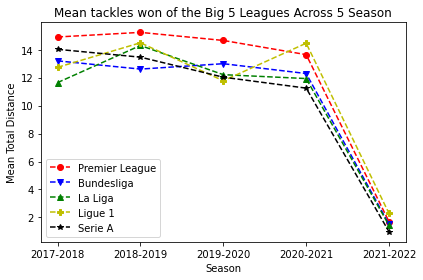

In [19]:
pl_season_TklW = pl_season_data['TklW'].mean().to_dict()
bundesliga_season_TklW = bundesliga_season_data['TklW'].mean().to_dict()
la_liga_season_TklW = la_liga_season_data['TklW'].mean().to_dict()
ligue_1_season_TklW = ligue_1_season_data['TklW'].mean().to_dict()
serie_a_season_TklW = serie_a_season_data['TklW'].mean().to_dict()

seasons = ['2017-2018', '2018-2019', '2019-2020', '2020-2021', '2021-2022']
plt.plot(seasons, pl_season_TklW.values(), 'ro', linestyle='dashed', label='Premier League')
plt.plot(seasons, bundesliga_season_TklW.values(), 'bv', linestyle='dashed', label='Bundesliga')
plt.plot(seasons, la_liga_season_TklW.values(), 'g^', linestyle='dashed', label='La Liga')
plt.plot(seasons, ligue_1_season_TklW.values(), 'yP', linestyle='dashed', label='Ligue 1')
plt.plot(seasons, serie_a_season_TklW.values(), 'k*', linestyle='dashed', label='Serie A')
plt.legend()
plt.xlabel('Season')
plt.ylabel('Mean Total Distance')
plt.title('Mean tackles won of the Big 5 Leagues Across {0} Season'.format(len(seasons)))
plt.tight_layout()
plt.show()

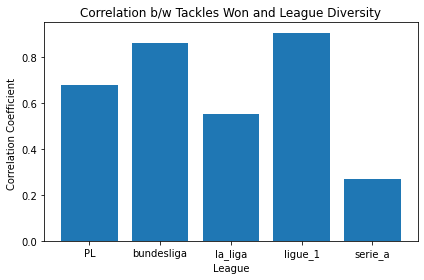

In [21]:
pl_pass_regression = float(r_regression(np.array(list(pl_season_diversity.values())).reshape(-1, 1),list(pl_season_TklW.values())))
bundesliga_pass_regression = float(r_regression(np.array(list(bundesliga_season_diversity.values())).reshape(-1, 1),list(bundesliga_season_TklW.values())))
la_liga_pass_regression = float(r_regression(np.array(list(la_liga_season_diversity.values())).reshape(-1, 1),list(la_liga_season_TklW.values())))
ligue_1_pass_regression = float(r_regression(np.array(list(ligue_1_season_diversity.values())).reshape(-1, 1),list(ligue_1_season_TklW.values())))
serie_a_pass_regression = float(r_regression(np.array(list(serie_a_season_diversity.values())).reshape(-1, 1),list(serie_a_season_TklW.values())))

xg_regression= np.array([pl_pass_regression, bundesliga_pass_regression, la_liga_pass_regression, ligue_1_pass_regression, serie_a_pass_regression])
plt.bar(x=np.array(["PL","bundesliga","la_liga","ligue_1","serie_a"]), height=xg_regression)

plt.xlabel('League')
plt.ylabel('Correlation Coefficient ')
plt.title('Correlation b/w Tackles Won and League Diversity')
plt.tight_layout()
plt.show()

## League Nations:
- Premier League : England 
- bundesliga : Germany
- La Liga : Spain
- Ligue 1 : France
- Serie A : Italy 